In [6]:
# step1 - importing packages and libraries for calculation and storing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [43]:
# step 2 importing amazon alexa dataset  
df_reviews=pd.read_csv('amazon_alexa.tsv' , sep='\t' )
#step 3- display first five records
df_reviews.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [9]:
df_reviews.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [10]:
# step 4 display  no of rows and column
df_reviews.shape

(3150, 5)

In [11]:
# stef 5 display structure of the file
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [12]:
# step 6 describing descriptive business analytics
df_reviews.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [13]:
# 7 converting date from object to data datatype and displaying year
df_reviews['date']=pd.to_datetime(df_reviews['date'])

In [14]:
# 8 #display year
df_reviews['date'].dt.year.value_counts()

2018    3150
Name: date, dtype: int64

In [15]:
#9 displaying minimum date 
df_reviews['date'].min()

Timestamp('2018-05-16 00:00:00')

In [16]:
#9 displaying max date 
df_reviews['date'].max()

Timestamp('2018-07-31 00:00:00')

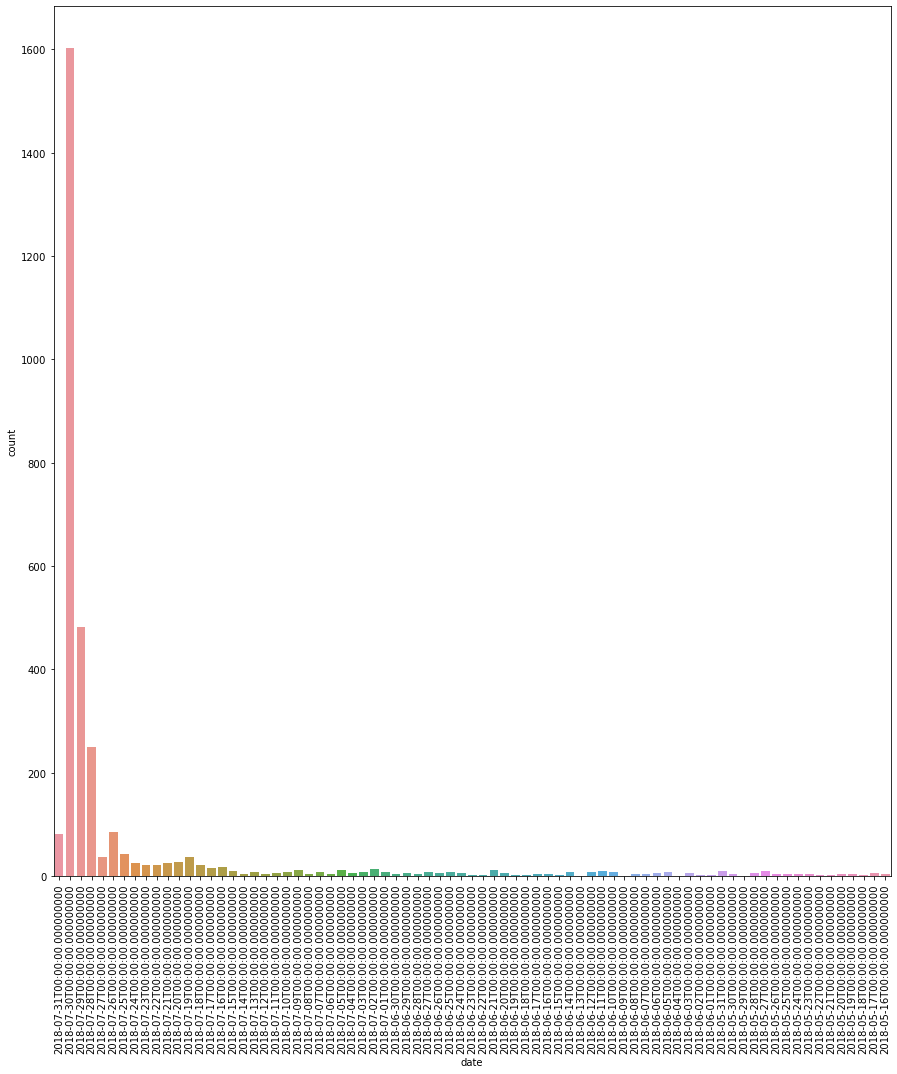

In [18]:
# 11 displaying data graphically
plt.figure(figsize=(15,16))
sns.countplot(x='date',data=df_reviews)
plt.xticks(rotation=90)
plt.show();

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='count'>

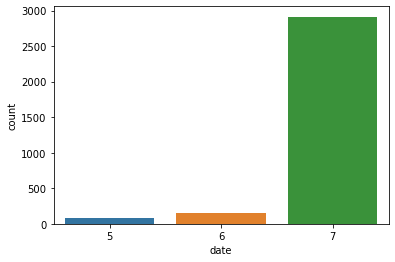

In [19]:
#12 displaying three month sales
sns.countplot(df_reviews['date'].dt.month)

In [20]:
# displaying 3 months sales in numbers
df_reviews['date'].dt.month.value_counts()


7    2913
6     155
5      82
Name: date, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

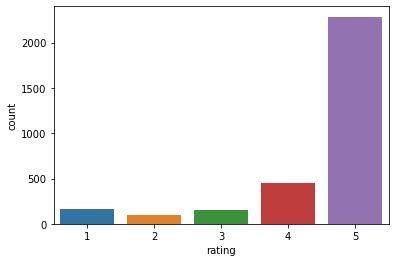

In [21]:
# graphical display of user rating
sns.countplot(x='rating',data=df_reviews)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
import seaborn as sns

In [28]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [33]:
# calculating the sentiment polarity
polarity=[] # list which will contain polarity of events
subjectivity=[] # list which will contain subjectivity of events
for i in df_reviews['verified_reviews'].values:
    try:
        analysis=TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
    except:
        polarity.append(0)
        subjectivity.append(0)


In [34]:
# adding the sentiment polarity column to the data
df_reviews['polarity']=polarity
df_reviews['subjectivity']=subjectivity

In [38]:
# display positive comments
df_reviews[df_reviews.polarity>0].head(10)

,rating,date,variation,verified_reviews,feedback,polarity,subjectivity
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,0.625000,0.600000
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,0.875000,0.800000
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.350000,0.450000
5,5,2018-07-31,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,0.294643,0.508929
6,3,2018-07-31,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,0.216667,0.458333
7,5,2018-07-31,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,0.200000,0.200000
8,5,2018-07-30,Heather Gray Fabric,looks great,1,0.800000,0.750000
9,5,2018-07-30,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,0.988281,0.675000
10,5,2018-07-30,Charcoal Fabric,"I sent it to my 85 year old Dad, and he talks ...",1,0.050000,0.266667
11,5,2018-07-30,Charcoal Fabric,I love it! Learning knew things with it eveyda...,1,0.403646,0.633333


In [39]:
# display negitive comments
df_reviews[df_reviews.polarity<0].head(10)

,rating,date,variation,verified_reviews,feedback,polarity,subjectivity
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,-0.100000,0.51250
14,5,2018-07-30,Oak Finish,Just what I expected....,1,-0.100000,0.40000
29,5,2018-07-30,Charcoal Fabric,Just like the other one,1,-0.125000,0.37500
109,4,2018-07-30,Sandstone Fabric,The outlet does not work with it. Was disappoi...,1,-0.750000,0.75000
141,1,2018-07-30,Charcoal Fabric,Not much features.,0,-0.100000,0.20000
145,3,2018-07-30,Sandstone Fabric,it's annoying that everything they show Alexa ...,1,-0.033333,0.57500
164,4,2018-07-30,Charcoal Fabric,"It performs pretty much as expected, but I am ...",1,-0.082738,0.63631
176,2,2018-07-30,Heather Gray Fabric,Sad joke. Worthless.,0,-0.650000,0.95000
262,5,2018-07-29,Sandstone Fabric,Arrived as expected.,1,-0.100000,0.40000
299,2,2018-07-29,Charcoal Fabric,Too difficult to set up. It keeps timing out ...,0,-0.500000,1.00000


In [40]:
# display neutral comments
df_reviews[df_reviews.polarity==0].head(10)

,rating,date,variation,verified_reviews,feedback,polarity,subjectivity
4,5,2018-07-31,Charcoal Fabric,Music,1,0.0,0.0000
31,4,2018-07-30,Charcoal Fabric,I like it,1,0.0,0.0000
49,3,2018-07-30,Charcoal Fabric,No different than Apple. To play a specific li...,1,0.0,0.3625
50,5,2018-07-30,Charcoal Fabric,"Excelente, lo unico es que no esta en español.",1,0.0,0.0000
60,5,2018-07-30,Heather Gray Fabric,😍,1,0.0,0.0000
62,4,2018-07-30,Heather Gray Fabric,Did t really know what I could use this device...,1,0.0,0.1500
67,5,2018-07-30,Charcoal Fabric,You’re all I need...na na nana!,1,0.0,0.0000
73,4,2018-07-30,Sandstone Fabric,Setting up,1,0.0,0.0000
74,5,2018-07-30,Heather Gray Fabric,She doesn’t always listen,1,0.0,0.0000
78,5,2018-07-30,Charcoal Fabric,I LIKE IT ALL,1,0.0,0.0000
